# Encontrando Expoplanetas com Python e dados da NASA

**Bibliotecas Utilizadas**

* **Lightkurve** ([https://lightkurve.github.io/lightkurve/](https://lightkurve.github.io/lightkurve/))

**Configuração Inicial**

In [29]:
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

## Analisando a Estrela de Tabby (KIC 8462852)

Nesta seção, demonstramos como analisar dados do telescópio Kepler para estudar trânsitos planetários e anomalias estelares, usando como exemplo a famosa Estrela de Tabby (KIC 8462852).

### Obtenção dos dados da Estrela de Tabby

Vamos trabalhar com a KIC 8462852, famosa por seus misteriosos padrões de escurecimento.

In [13]:
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest')

**Explicação do código acima**

1. `search_targetpixelfile("KIC 8462852", quarter=16)` - Busca um arquivo de *pixel* de alvo (*Target Pixel File - TFP*) do telescópio Kepler para:
    * O objeto com ID 8462852 (Famosa "Estrela de Tabby" ou KIC 8462852)
    * O trimestre 16 (quarter=16) dos dados da missão Kepler
2. `download(quality_bitmask='hardest')` efetua o *download* do arquivo aplicano um filtro de qualidade mais rigoroso ('hardest'), que remove todos os pixels/data points com possíveis problemas de qualidade;
3. O resultado é armazenado na variável `pixelfile`.

#### Visualização dos dados Brutos

Primeiro vamos visualizar o frame inicial do Target Pixel File:

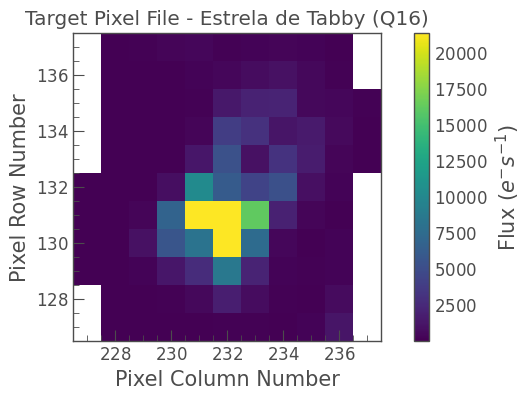

In [30]:
pixelfile.plot(frame=1)
plt.title('Target Pixel File - Estrela de Tabby (Q16)')
plt.show()

### Criando uma Curva de Luz

Convertemos os pixels para uma curva de luz combinando todos os pixels válidos:

In [24]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

**Parâmetros**:

- `apperture_mask='all'` - Usa todos os pixels para calcular o fluxo
- O resultado é armazenado na variável `lc`(light curve object)

#### Visualização da Curva de Luz

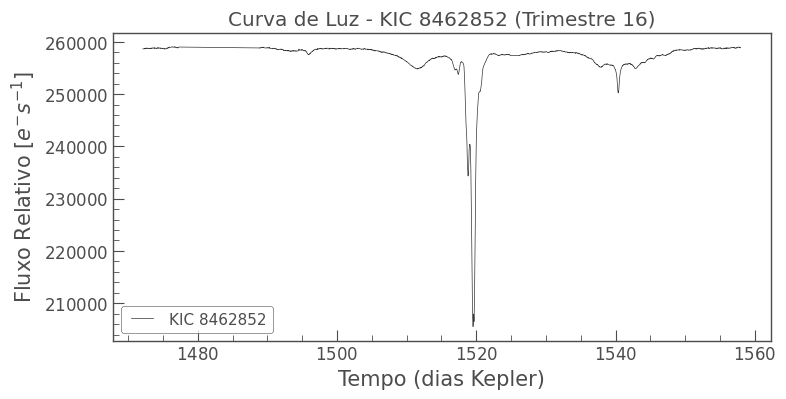

In [ ]:
lc.plot()
plt.title('Curva de Luz - KIC 8462852 (Trimestre 16)')
plt.ylabel('Fluxo Relativo [$e^{-}s^{-1}$]')
plt.xlabel('Tempo (dias Kepler)')
plt.show()

### Análise Inicial

Podemos observar:
- Variações de brilho características
- Possíveis eventos de escurecimento
- Padrões que mecerem investigação mais detalhada

### Próximos Passos

Análises que podem ser realizadas:
1. Detecção de trânsitos planetários
2. Busca por padrões periódicos
3. Análise das misteriosas reduções de brilho
4. Comparação com outros trimestres